### Documentation:
#### Data Set:4.linearsep


### Data Description:
- The dataset consists of three columns and 100 rows which includes two feature columns and one label column. 
- Features columns are in the form of float and continuous values ranges from [-1.801737 to 3.108743] and [0.568025 to 3.892678] and the means are at [0.930868 and 1.855540]. 
- Whereas label is in the form discreate numerical float values that includes [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels. There are zero duplicates and no null values consists in the dataset. 
- Pattern that is formed by the input features is linear separating. 
- That means a liner line is separating 0 label and 1 label.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\Deep Learning data\\4.linearsep.csv". The dataset is stored in the DataFrame df.

In [2]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\4.linearsep.csv",header = None)
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [3]:
df.shape

(100, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [5]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.930868,1.855540,0.500000
std,1.248367,0.713457,0.502519
min,-1.801737,0.568025,0.000000
25%,-0.143369,1.296152,0.000000
50%,1.171946,1.806731,0.500000
75%,1.881075,2.249652,1.000000
max,3.108743,3.892678,1.000000


In [6]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

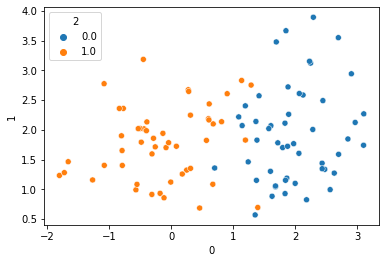

In [9]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 10% of the total dataset.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains =std.fit_transform(X_train)
X_tests =std.transform(X_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Model Architecture:
The neural network model is defined using the Sequential class from Keras. It consists of five dense layers, each with a different number of units and activation functions.

In [40]:
model = Sequential()
model.add(Dense(6,activation="relu",kernel_initializer='he_uniform',input_dim=2))

model.add(Dense(4,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(3,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(2,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))

### Model Summary: 
The model summary is printed, which provides an overview of the model architecture, including the number of parameters and the output shapes of each layer.

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 18        
                                                                 
 dense_13 (Dense)            (None, 4)                 28        
                                                                 
 dense_14 (Dense)            (None, 3)                 15        
                                                                 
 dense_15 (Dense)            (None, 2)                 8         
                                                                 
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


### Model Compilation: 
The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.

In [42]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Model Training: 
- The model is trained on the training data (X_trains and y_train) for 50 epochs with a batch size of 12. 
- A validation split of 0.2 is used to monitor the validation loss and accuracy during training.
- The training history is stored in the 'history' variable.

In [43]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 0s 23ms/step - loss: 0.6747 - accuracy: 0.5972 - val_loss: 0.6752 - val_accuracy: 0.4444
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6649 - accuracy: 0.5417 - val_loss: 0.6656 - val_accuracy: 0.7222
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.8056 - val_loss: 0.6564 - val_accuracy: 0.7222
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.8194 - val_loss: 0.6473 - val_accuracy: 0.7222
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.8194 - val_loss: 0.6378 - val_accuracy: 0.7222
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.8194 - val_loss: 0.6280 - val_accuracy: 0.7222
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6268 - accuracy: 0.8333 - val_loss: 0.6178 - val_accuracy: 0.7222
Epoch 8/50
6/6 [=================

### Plotting Decision Regions:
- The mlxtend library is used to plot the decision regions of the model using the training data (X_trains and y_train). 
- The plot shows how the model separates different classes in the input space.

In [44]:
from mlxtend.plotting import plot_decision_regions as pt

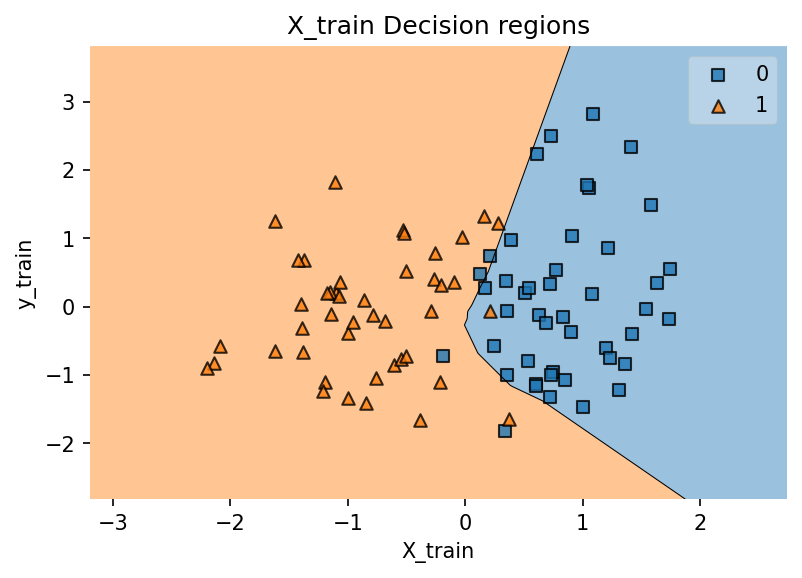

In [45]:

plt.figure(figsize=(6,4),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions")
plt.xlabel("X_train",color='black')
plt.ylabel("y_train",color='black')
plt.show()


### Prediction: 
The model is used to predict the outputs for the test data (X_tests), and the predictions are thresholded at 0.5 to obtain binary predictions (0 or 1).


In [46]:
y_pred = model.predict(X_tests)

In [47]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

#### Computing the accuracy of the predictions is calculated using the accuracy_score function from scikit-learn by comparing the predicted values (y_predf) with the true values (y_test).

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.9

### Plotting Loss Curve: 
- The training loss and validation loss from the training history are plotted using Matplotlib. 
- This can help visualize the convergence and overfitting of the model during training.

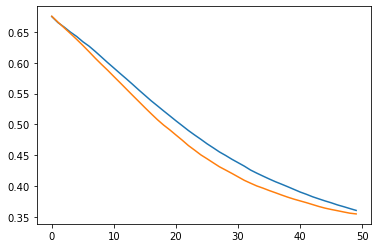

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting Decision Regions for Test Data:
The decision regions of the model are plotted using the test data (X_tests and y_predf) to visualize how the model classifies the test samples.

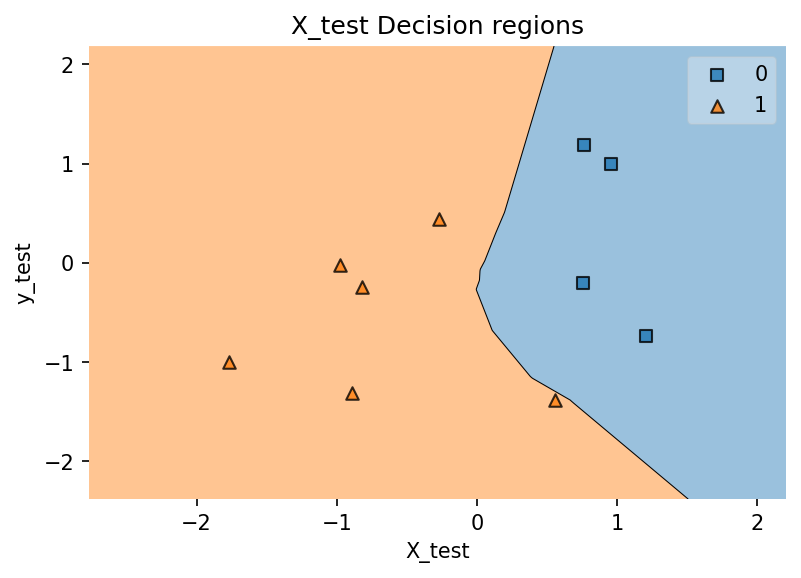

In [52]:
plt.figure(figsize=(6,4),dpi=150)
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()